In [1]:
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
!pip install pmdarima
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pmdarima import auto_arima 
from pandas.plotting import lag_plot
import warnings 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima_model import ARIMA
import math

In [2]:
df=pd.read_csv('MSFT.csv')
df.head()
print(df.shape)
    

(1258, 7)


In [3]:
#Checking for missing values 
print('Number of missing values are \n', df.isnull().sum())
#no missing values

Number of missing values are 
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Text(0.5, 1.0, 'MSFT Autocorrelation plot')

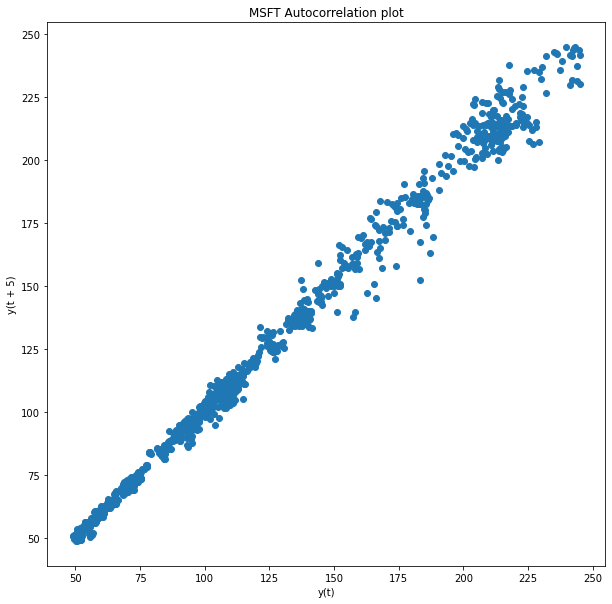

In [4]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('MSFT Autocorrelation plot')

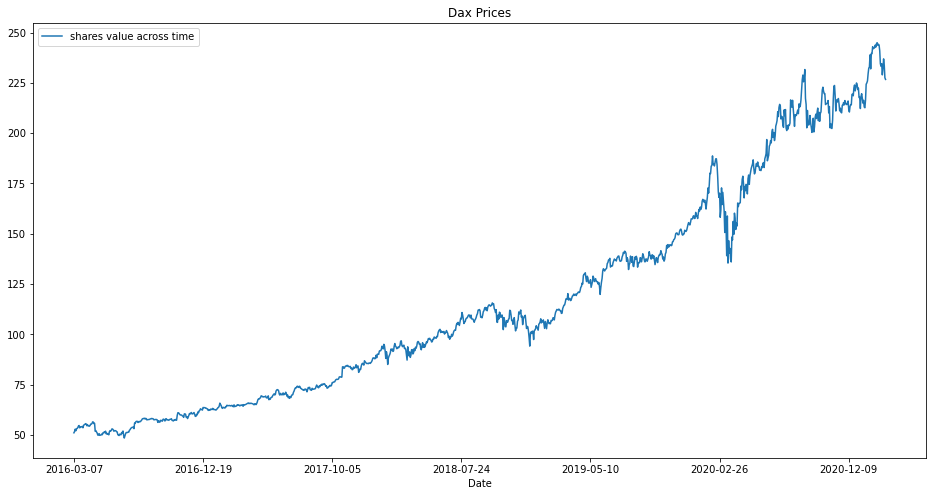

In [5]:
df.plot(x = 'Date', y = 'Close', label = "shares value across time", figsize = (16,8), title = "Dax Prices")
plt.rcParams['date.epoch'] = '0000-12-31'
 

In [6]:
df['Date'][1257]

'2021-03-04'

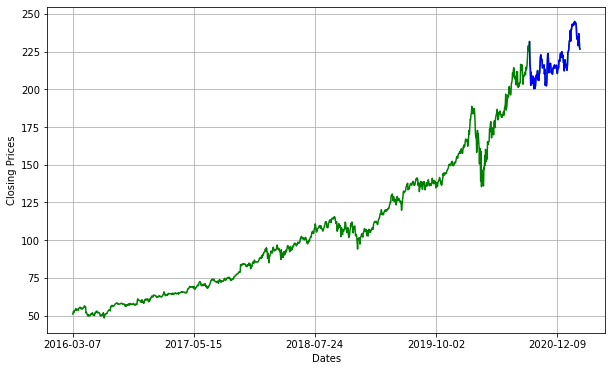

In [7]:
df_log = df.filter(['Close'])
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.xticks(np.arange(0,1257, 300), df['Date'][0:1257:300]) 
plt.plot(test_data, 'blue', label='Test data')
 
    
   

In [8]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
#model_autoARIMA.plot_diagnostics(figsize=(15,8))
#plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5084.385, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4954.570, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4966.462, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5087.518, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4955.634, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4955.966, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4918.302, Time=0.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4918.008, Time=0.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4947.937, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4919.567, Time=1.01 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4918.081, Time=0.74 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=4925.714, Time=0.27 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept
Total fit time: 4.215 seconds
                               SARIMAX Results                                
Dep. Vari

In [9]:
model = ARIMA(train_data, order=(3,1,1))  
model = model.fit()  
print(model.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1128
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -2453.004
Method:                       css-mle   S.D. of innovations              2.129
Date:                Fri, 27 Aug 2021   AIC                           4918.008
Time:                        08:38:54   BIC                           4948.177
Sample:                             1   HQIC                          4929.407
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1549      0.049      3.147      0.002       0.058       0.251
ar.L1.D.Close    -1.2239      0.062    -19.616      0.000      -1.346      -1.102
ar.L2.D.Close    -0.3031      0.053     

C:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


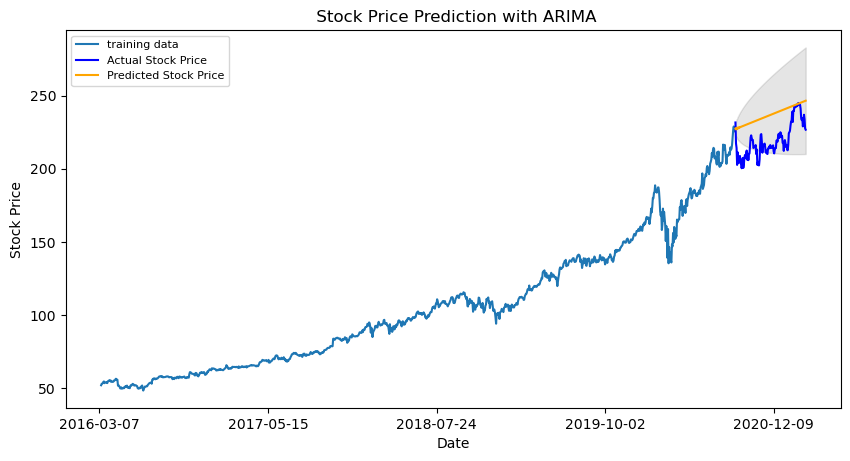

In [10]:
fc, se, conf = model.forecast(126, alpha=0.05)  # 95% conf
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title(' Stock Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(np.arange(0,1257, 300), df['Date'][0:1257:300]) 
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [11]:

from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# RMSE for ARIMA model
RMSE_ARIMA = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE with ARIMA', RMSE_ARIMA)

RMSE with ARIMA 19.39989604801805


In [12]:
#printing predictions for next 180 days
index_future_dates=pd.date_range(start='2021-03-5',end='2021-08-31')
print(index_future_dates)

DatetimeIndex(['2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
               '2021-03-13', '2021-03-14',
               ...
               '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', length=180, freq='D')


In [13]:
pred=model.predict(start=len(train_data),end=len(train_data)+179,typ='levels').rename('ARIMA Predictions')
 #print(comp_pred)
pred.index=index_future_dates
print(pred) 

2021-03-05    227.387705
2021-03-06    226.906313
2021-03-07    227.941659
2021-03-08    227.209824
2021-03-09    228.146938
                 ...    
2021-08-27    254.283913
2021-08-28    254.438848
2021-08-29    254.593782
2021-08-30    254.748717
2021-08-31    254.903651
Freq: D, Name: ARIMA Predictions, Length: 180, dtype: float64


<AxesSubplot:title={'center':' Stock Price Prediction with ARIMA for next 180 days'}>

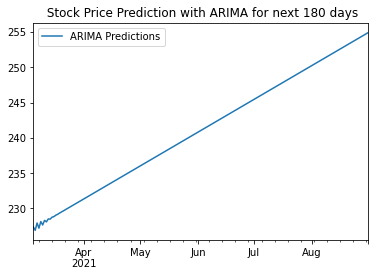

In [14]:
plt.title(' Stock Price Prediction with ARIMA for next 180 days')
pred.plot(legend=True)
#df_log.plot(legend=True)


In [15]:
df1 = df.filter(['Close'])


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 441)

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
      a = dataset[i:(i+time_step), 0]   
      dataX.append(a)
      dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [77]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
# Train the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
23/23 [==============================] - 4s 157ms/step - loss: 0.0070 - val_loss: 0.0188
Epoch 2/100
23/23 [==============================] - 2s 92ms/step - loss: 3.6269e-04 - val_loss: 0.0027
Epoch 3/100
23/23 [==============================] - 2s 97ms/step - loss: 1.9694e-04 - val_loss: 0.0025
Epoch 4/100
23/23 [==============================] - 2s 100ms/step - loss: 1.8678e-04 - val_loss: 0.0031
Epoch 5/100
23/23 [==============================] - 3s 144ms/step - loss: 1.8259e-04 - val_loss: 0.0033
Epoch 6/100
23/23 [==============================] - 3s 141ms/step - loss: 1.6039e-04 - val_loss: 0.0038
Epoch 7/100
23/23 [==============================] - 3s 150ms/step - loss: 1.5261e-04 - val_loss: 0.0062
Epoch 8/100
23/23 [==============================] - 3s 138ms/step - loss: 1.8904e-04 - val_loss: 0.0030
Epoch 9/100
23/23 [==============================] - 3s 150ms/step - loss: 1.8642e-04 - val_loss: 0.0052
Epoch 10/100
23/23 [==============================] - 4s 154m

23/23 [==============================] - 3s 124ms/step - loss: 1.1468e-04 - val_loss: 0.0022
Epoch 79/100
23/23 [==============================] - 2s 97ms/step - loss: 8.8812e-05 - val_loss: 0.0018
Epoch 80/100
23/23 [==============================] - 3s 127ms/step - loss: 9.4901e-05 - val_loss: 0.0050
Epoch 81/100
23/23 [==============================] - 3s 137ms/step - loss: 9.1564e-05 - val_loss: 9.7451e-04
Epoch 82/100
23/23 [==============================] - 3s 137ms/step - loss: 1.2172e-04 - val_loss: 0.0010
Epoch 83/100
23/23 [==============================] - 3s 136ms/step - loss: 9.3263e-05 - val_loss: 0.0030
Epoch 84/100
23/23 [==============================] - 3s 140ms/step - loss: 8.8683e-05 - val_loss: 0.0025
Epoch 85/100
23/23 [==============================] - 3s 137ms/step - loss: 7.7146e-05 - val_loss: 0.0023
Epoch 86/100
23/23 [==============================] - 3s 138ms/step - loss: 8.1817e-05 - val_loss: 0.0021
Epoch 87/100
23/23 [==============================] - 3s

In [79]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [80]:
### Test Data RMSE
from sklearn.metrics import mean_squared_error
RMSE_LSTM=math.sqrt(mean_squared_error(ytest,test_predict))

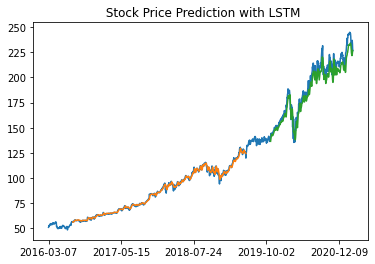

In [81]:
# Plot the data

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title(' Stock Price Prediction with LSTM')
plt.xticks(np.arange(0,1257, 300), df['Date'][0:1257:300]) 
plt.show()






In [82]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [83]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [84]:
#  prediction for next 180 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<180):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    



[0.8711548]
101
1 day input [0.8799857  0.88741349 0.87723849 0.87113349 0.87113349 0.84345745
 0.84564504 0.84640822 0.84686607 0.85368331 0.82239519 0.83852257
 0.7847476  0.79512615 0.78367927 0.78296702 0.80382575 0.85449733
 0.88960108 0.89178875 0.86467234 0.82712653 0.85531135 0.84966421
 0.85510781 0.85877082 0.84467848 0.82748269 0.83429993 0.8239723
 0.82254781 0.84162595 0.84167679 0.84859581 0.84269436 0.85358162
 0.84930805 0.84355922 0.8441697  0.84381354 0.85256406 0.8311457
 0.8246337  0.83857342 0.84335568 0.8429996  0.86920022 0.86991246
 0.86568982 0.88603984 0.89290801 0.8780525  0.88685386 0.89809729
 0.89397634 0.8814102  0.88517498 0.8611111  0.86217943 0.83343506
 0.86416356 0.87092995 0.86009361 0.84706954 0.85424294 0.83735246
 0.83547003 0.85475172 0.89494298 0.89814813 0.90313386 0.92134714
 0.93559217 0.93849201 0.96916966 0.93370982 0.97283267 0.97212042
 0.98987584 0.98483918 0.98580582 0.98717947 0.99379324 0.98896012
 0.99745625 1.         0.99343708 0.

12 day output [[0.64390194]]
13 day input [0.7847476  0.79512615 0.78367927 0.78296702 0.80382575 0.85449733
 0.88960108 0.89178875 0.86467234 0.82712653 0.85531135 0.84966421
 0.85510781 0.85877082 0.84467848 0.82748269 0.83429993 0.8239723
 0.82254781 0.84162595 0.84167679 0.84859581 0.84269436 0.85358162
 0.84930805 0.84355922 0.8441697  0.84381354 0.85256406 0.8311457
 0.8246337  0.83857342 0.84335568 0.8429996  0.86920022 0.86991246
 0.86568982 0.88603984 0.89290801 0.8780525  0.88685386 0.89809729
 0.89397634 0.8814102  0.88517498 0.8611111  0.86217943 0.83343506
 0.86416356 0.87092995 0.86009361 0.84706954 0.85424294 0.83735246
 0.83547003 0.85475172 0.89494298 0.89814813 0.90313386 0.92134714
 0.93559217 0.93849201 0.96916966 0.93370982 0.97283267 0.97212042
 0.98987584 0.98483918 0.98580582 0.98717947 0.99379324 0.98896012
 0.99745625 1.         0.99343708 0.99598083 0.99389493 0.97954821
 0.9466829  0.94037444 0.94688644 0.91859992 0.93584656 0.95904557
 0.94342689 0.91132475

24 day output [[0.5346303]]
25 day input [0.85510781 0.85877082 0.84467848 0.82748269 0.83429993 0.8239723
 0.82254781 0.84162595 0.84167679 0.84859581 0.84269436 0.85358162
 0.84930805 0.84355922 0.8441697  0.84381354 0.85256406 0.8311457
 0.8246337  0.83857342 0.84335568 0.8429996  0.86920022 0.86991246
 0.86568982 0.88603984 0.89290801 0.8780525  0.88685386 0.89809729
 0.89397634 0.8814102  0.88517498 0.8611111  0.86217943 0.83343506
 0.86416356 0.87092995 0.86009361 0.84706954 0.85424294 0.83735246
 0.83547003 0.85475172 0.89494298 0.89814813 0.90313386 0.92134714
 0.93559217 0.93849201 0.96916966 0.93370982 0.97283267 0.97212042
 0.98987584 0.98483918 0.98580582 0.98717947 0.99379324 0.98896012
 0.99745625 1.         0.99343708 0.99598083 0.99389493 0.97954821
 0.9466829  0.94037444 0.94688644 0.91859992 0.93584656 0.95904557
 0.94342689 0.91132475 0.90710211 0.87115479 0.84078443 0.80925423
 0.78037381 0.75573814 0.7354477  0.71878523 0.70470518 0.69215548
 0.68026263 0.6684227  

34 day input [0.84859581 0.84269436 0.85358162 0.84930805 0.84355922 0.8441697
 0.84381354 0.85256406 0.8311457  0.8246337  0.83857342 0.84335568
 0.8429996  0.86920022 0.86991246 0.86568982 0.88603984 0.89290801
 0.8780525  0.88685386 0.89809729 0.89397634 0.8814102  0.88517498
 0.8611111  0.86217943 0.83343506 0.86416356 0.87092995 0.86009361
 0.84706954 0.85424294 0.83735246 0.83547003 0.85475172 0.89494298
 0.89814813 0.90313386 0.92134714 0.93559217 0.93849201 0.96916966
 0.93370982 0.97283267 0.97212042 0.98987584 0.98483918 0.98580582
 0.98717947 0.99379324 0.98896012 0.99745625 1.         0.99343708
 0.99598083 0.99389493 0.97954821 0.9466829  0.94037444 0.94688644
 0.91859992 0.93584656 0.95904557 0.94342689 0.91132475 0.90710211
 0.87115479 0.84078443 0.80925423 0.78037381 0.75573814 0.7354477
 0.71878523 0.70470518 0.69215548 0.68026263 0.6684227  0.65632147
 0.64390194 0.6313023  0.61877924 0.6066305  0.5951317  0.58449161
 0.57483006 0.56617451 0.55847239 0.55161357 0.5454

44 day output [[0.46182042]]
45 day input [0.84335568 0.8429996  0.86920022 0.86991246 0.86568982 0.88603984
 0.89290801 0.8780525  0.88685386 0.89809729 0.89397634 0.8814102
 0.88517498 0.8611111  0.86217943 0.83343506 0.86416356 0.87092995
 0.86009361 0.84706954 0.85424294 0.83735246 0.83547003 0.85475172
 0.89494298 0.89814813 0.90313386 0.92134714 0.93559217 0.93849201
 0.96916966 0.93370982 0.97283267 0.97212042 0.98987584 0.98483918
 0.98580582 0.98717947 0.99379324 0.98896012 0.99745625 1.
 0.99343708 0.99598083 0.99389493 0.97954821 0.9466829  0.94037444
 0.94688644 0.91859992 0.93584656 0.95904557 0.94342689 0.91132475
 0.90710211 0.87115479 0.84078443 0.80925423 0.78037381 0.75573814
 0.7354477  0.71878523 0.70470518 0.69215548 0.68026263 0.6684227
 0.65632147 0.64390194 0.6313023  0.61877924 0.6066305  0.5951317
 0.58449161 0.57483006 0.56617451 0.55847239 0.55161357 0.54545391
 0.53984064 0.5346303  0.52970314 0.52497083 0.52037597 0.51589
 0.51150697 0.50723505 0.50309014 

52 day output [[0.4436154]]
53 day input [0.88685386 0.89809729 0.89397634 0.8814102  0.88517498 0.8611111
 0.86217943 0.83343506 0.86416356 0.87092995 0.86009361 0.84706954
 0.85424294 0.83735246 0.83547003 0.85475172 0.89494298 0.89814813
 0.90313386 0.92134714 0.93559217 0.93849201 0.96916966 0.93370982
 0.97283267 0.97212042 0.98987584 0.98483918 0.98580582 0.98717947
 0.99379324 0.98896012 0.99745625 1.         0.99343708 0.99598083
 0.99389493 0.97954821 0.9466829  0.94037444 0.94688644 0.91859992
 0.93584656 0.95904557 0.94342689 0.91132475 0.90710211 0.87115479
 0.84078443 0.80925423 0.78037381 0.75573814 0.7354477  0.71878523
 0.70470518 0.69215548 0.68026263 0.6684227  0.65632147 0.64390194
 0.6313023  0.61877924 0.6066305  0.5951317  0.58449161 0.57483006
 0.56617451 0.55847239 0.55161357 0.54545391 0.53984064 0.5346303
 0.52970314 0.52497083 0.52037597 0.51589    0.51150697 0.50723505
 0.50309014 0.49908867 0.49524361 0.49156174 0.48804259 0.48467937
 0.48146042 0.47837135 

60 day output [[0.42908752]]
61 day input [0.86416356 0.87092995 0.86009361 0.84706954 0.85424294 0.83735246
 0.83547003 0.85475172 0.89494298 0.89814813 0.90313386 0.92134714
 0.93559217 0.93849201 0.96916966 0.93370982 0.97283267 0.97212042
 0.98987584 0.98483918 0.98580582 0.98717947 0.99379324 0.98896012
 0.99745625 1.         0.99343708 0.99598083 0.99389493 0.97954821
 0.9466829  0.94037444 0.94688644 0.91859992 0.93584656 0.95904557
 0.94342689 0.91132475 0.90710211 0.87115479 0.84078443 0.80925423
 0.78037381 0.75573814 0.7354477  0.71878523 0.70470518 0.69215548
 0.68026263 0.6684227  0.65632147 0.64390194 0.6313023  0.61877924
 0.6066305  0.5951317  0.58449161 0.57483006 0.56617451 0.55847239
 0.55161357 0.54545391 0.53984064 0.5346303  0.52970314 0.52497083
 0.52037597 0.51589    0.51150697 0.50723505 0.50309014 0.49908867
 0.49524361 0.49156174 0.48804259 0.48467937 0.48146042 0.47837135
 0.47539666 0.47252199 0.46973529 0.46702659 0.46438965 0.46182042
 0.45931676 0.456878

68 day output [[0.41712976]]
69 day input [0.89494298 0.89814813 0.90313386 0.92134714 0.93559217 0.93849201
 0.96916966 0.93370982 0.97283267 0.97212042 0.98987584 0.98483918
 0.98580582 0.98717947 0.99379324 0.98896012 0.99745625 1.
 0.99343708 0.99598083 0.99389493 0.97954821 0.9466829  0.94037444
 0.94688644 0.91859992 0.93584656 0.95904557 0.94342689 0.91132475
 0.90710211 0.87115479 0.84078443 0.80925423 0.78037381 0.75573814
 0.7354477  0.71878523 0.70470518 0.69215548 0.68026263 0.6684227
 0.65632147 0.64390194 0.6313023  0.61877924 0.6066305  0.5951317
 0.58449161 0.57483006 0.56617451 0.55847239 0.55161357 0.54545391
 0.53984064 0.5346303  0.52970314 0.52497083 0.52037597 0.51589
 0.51150697 0.50723505 0.50309014 0.49908867 0.49524361 0.49156174
 0.48804259 0.48467937 0.48146042 0.47837135 0.47539666 0.47252199
 0.46973529 0.46702659 0.46438965 0.46182042 0.45931676 0.45687851
 0.45450559 0.45219836 0.44995672 0.44778001 0.44566697 0.44361541
 0.44162288 0.43968648 0.43780309

76 day output [[0.40708855]]
77 day input [0.97283267 0.97212042 0.98987584 0.98483918 0.98580582 0.98717947
 0.99379324 0.98896012 0.99745625 1.         0.99343708 0.99598083
 0.99389493 0.97954821 0.9466829  0.94037444 0.94688644 0.91859992
 0.93584656 0.95904557 0.94342689 0.91132475 0.90710211 0.87115479
 0.84078443 0.80925423 0.78037381 0.75573814 0.7354477  0.71878523
 0.70470518 0.69215548 0.68026263 0.6684227  0.65632147 0.64390194
 0.6313023  0.61877924 0.6066305  0.5951317  0.58449161 0.57483006
 0.56617451 0.55847239 0.55161357 0.54545391 0.53984064 0.5346303
 0.52970314 0.52497083 0.52037597 0.51589    0.51150697 0.50723505
 0.50309014 0.49908867 0.49524361 0.49156174 0.48804259 0.48467937
 0.48146042 0.47837135 0.47539666 0.47252199 0.46973529 0.46702659
 0.46438965 0.46182042 0.45931676 0.45687851 0.45450559 0.45219836
 0.44995672 0.44778001 0.44566697 0.44361541 0.44162288 0.43968648
 0.43780309 0.43597007 0.43418422 0.43244323 0.4307451  0.42908752
 0.4274691  0.4258884

84 day output [[0.39851454]]
85 day input [0.99745625 1.         0.99343708 0.99598083 0.99389493 0.97954821
 0.9466829  0.94037444 0.94688644 0.91859992 0.93584656 0.95904557
 0.94342689 0.91132475 0.90710211 0.87115479 0.84078443 0.80925423
 0.78037381 0.75573814 0.7354477  0.71878523 0.70470518 0.69215548
 0.68026263 0.6684227  0.65632147 0.64390194 0.6313023  0.61877924
 0.6066305  0.5951317  0.58449161 0.57483006 0.56617451 0.55847239
 0.55161357 0.54545391 0.53984064 0.5346303  0.52970314 0.52497083
 0.52037597 0.51589    0.51150697 0.50723505 0.50309014 0.49908867
 0.49524361 0.49156174 0.48804259 0.48467937 0.48146042 0.47837135
 0.47539666 0.47252199 0.46973529 0.46702659 0.46438965 0.46182042
 0.45931676 0.45687851 0.45450559 0.45219836 0.44995672 0.44778001
 0.44566697 0.44361541 0.44162288 0.43968648 0.43780309 0.43597007
 0.43418422 0.43244323 0.4307451  0.42908752 0.4274691  0.42588848
 0.42434406 0.4228352  0.42136022 0.41991845 0.41850859 0.41712976
 0.41578045 0.414460

92 day output [[0.3911088]]
93 day input [0.94688644 0.91859992 0.93584656 0.95904557 0.94342689 0.91132475
 0.90710211 0.87115479 0.84078443 0.80925423 0.78037381 0.75573814
 0.7354477  0.71878523 0.70470518 0.69215548 0.68026263 0.6684227
 0.65632147 0.64390194 0.6313023  0.61877924 0.6066305  0.5951317
 0.58449161 0.57483006 0.56617451 0.55847239 0.55161357 0.54545391
 0.53984064 0.5346303  0.52970314 0.52497083 0.52037597 0.51589
 0.51150697 0.50723505 0.50309014 0.49908867 0.49524361 0.49156174
 0.48804259 0.48467937 0.48146042 0.47837135 0.47539666 0.47252199
 0.46973529 0.46702659 0.46438965 0.46182042 0.45931676 0.45687851
 0.45450559 0.45219836 0.44995672 0.44778001 0.44566697 0.44361541
 0.44162288 0.43968648 0.43780309 0.43597007 0.43418422 0.43244323
 0.4307451  0.42908752 0.4274691  0.42588848 0.42434406 0.4228352
 0.42136022 0.41991845 0.41850859 0.41712976 0.41578045 0.41446009
 0.41316754 0.41190168 0.41066176 0.40944669 0.40825596 0.40708855
 0.40594381 0.4048211  0.40

100 day output [[0.38465315]]
101 day input [0.84078443 0.80925423 0.78037381 0.75573814 0.7354477  0.71878523
 0.70470518 0.69215548 0.68026263 0.6684227  0.65632147 0.64390194
 0.6313023  0.61877924 0.6066305  0.5951317  0.58449161 0.57483006
 0.56617451 0.55847239 0.55161357 0.54545391 0.53984064 0.5346303
 0.52970314 0.52497083 0.52037597 0.51589    0.51150697 0.50723505
 0.50309014 0.49908867 0.49524361 0.49156174 0.48804259 0.48467937
 0.48146042 0.47837135 0.47539666 0.47252199 0.46973529 0.46702659
 0.46438965 0.46182042 0.45931676 0.45687851 0.45450559 0.45219836
 0.44995672 0.44778001 0.44566697 0.44361541 0.44162288 0.43968648
 0.43780309 0.43597007 0.43418422 0.43244323 0.4307451  0.42908752
 0.4274691  0.42588848 0.42434406 0.4228352  0.42136022 0.41991845
 0.41850859 0.41712976 0.41578045 0.41446009 0.41316754 0.41190168
 0.41066176 0.40944669 0.40825596 0.40708855 0.40594381 0.4048211
 0.40371987 0.40263939 0.40157902 0.40053856 0.39951715 0.39851454
 0.39752996 0.396563

108 day output [[0.3789828]]
109 day input [0.68026263 0.6684227  0.65632147 0.64390194 0.6313023  0.61877924
 0.6066305  0.5951317  0.58449161 0.57483006 0.56617451 0.55847239
 0.55161357 0.54545391 0.53984064 0.5346303  0.52970314 0.52497083
 0.52037597 0.51589    0.51150697 0.50723505 0.50309014 0.49908867
 0.49524361 0.49156174 0.48804259 0.48467937 0.48146042 0.47837135
 0.47539666 0.47252199 0.46973529 0.46702659 0.46438965 0.46182042
 0.45931676 0.45687851 0.45450559 0.45219836 0.44995672 0.44778001
 0.44566697 0.44361541 0.44162288 0.43968648 0.43780309 0.43597007
 0.43418422 0.43244323 0.4307451  0.42908752 0.4274691  0.42588848
 0.42434406 0.4228352  0.42136022 0.41991845 0.41850859 0.41712976
 0.41578045 0.41446009 0.41316754 0.41190168 0.41066176 0.40944669
 0.40825596 0.40708855 0.40594381 0.4048211  0.40371987 0.40263939
 0.40157902 0.40053856 0.39951715 0.39851454 0.39752996 0.39656305
 0.39561355 0.39468074 0.39376429 0.39286372 0.39197871 0.39110881
 0.39025378 0.38941

116 day output [[0.37396994]]
117 day input [0.58449161 0.57483006 0.56617451 0.55847239 0.55161357 0.54545391
 0.53984064 0.5346303  0.52970314 0.52497083 0.52037597 0.51589
 0.51150697 0.50723505 0.50309014 0.49908867 0.49524361 0.49156174
 0.48804259 0.48467937 0.48146042 0.47837135 0.47539666 0.47252199
 0.46973529 0.46702659 0.46438965 0.46182042 0.45931676 0.45687851
 0.45450559 0.45219836 0.44995672 0.44778001 0.44566697 0.44361541
 0.44162288 0.43968648 0.43780309 0.43597007 0.43418422 0.43244323
 0.4307451  0.42908752 0.4274691  0.42588848 0.42434406 0.4228352
 0.42136022 0.41991845 0.41850859 0.41712976 0.41578045 0.41446009
 0.41316754 0.41190168 0.41066176 0.40944669 0.40825596 0.40708855
 0.40594381 0.4048211  0.40371987 0.40263939 0.40157902 0.40053856
 0.39951715 0.39851454 0.39752996 0.39656305 0.39561355 0.39468074
 0.39376429 0.39286372 0.39197871 0.39110881 0.39025378 0.38941312
 0.38858646 0.3877736  0.38697413 0.38618779 0.38541418 0.38465315
 0.38390437 0.38316751

124 day output [[0.36951432]]
125 day input [0.52970314 0.52497083 0.52037597 0.51589    0.51150697 0.50723505
 0.50309014 0.49908867 0.49524361 0.49156174 0.48804259 0.48467937
 0.48146042 0.47837135 0.47539666 0.47252199 0.46973529 0.46702659
 0.46438965 0.46182042 0.45931676 0.45687851 0.45450559 0.45219836
 0.44995672 0.44778001 0.44566697 0.44361541 0.44162288 0.43968648
 0.43780309 0.43597007 0.43418422 0.43244323 0.4307451  0.42908752
 0.4274691  0.42588848 0.42434406 0.4228352  0.42136022 0.41991845
 0.41850859 0.41712976 0.41578045 0.41446009 0.41316754 0.41190168
 0.41066176 0.40944669 0.40825596 0.40708855 0.40594381 0.4048211
 0.40371987 0.40263939 0.40157902 0.40053856 0.39951715 0.39851454
 0.39752996 0.39656305 0.39561355 0.39468074 0.39376429 0.39286372
 0.39197871 0.39110881 0.39025378 0.38941312 0.38858646 0.3877736
 0.38697413 0.38618779 0.38541418 0.38465315 0.38390437 0.38316751
 0.38244236 0.38172859 0.38102591 0.38033435 0.37965342 0.37898281
 0.37832251 0.377672

132 day output [[0.36553556]]
133 day input [0.49524361 0.49156174 0.48804259 0.48467937 0.48146042 0.47837135
 0.47539666 0.47252199 0.46973529 0.46702659 0.46438965 0.46182042
 0.45931676 0.45687851 0.45450559 0.45219836 0.44995672 0.44778001
 0.44566697 0.44361541 0.44162288 0.43968648 0.43780309 0.43597007
 0.43418422 0.43244323 0.4307451  0.42908752 0.4274691  0.42588848
 0.42434406 0.4228352  0.42136022 0.41991845 0.41850859 0.41712976
 0.41578045 0.41446009 0.41316754 0.41190168 0.41066176 0.40944669
 0.40825596 0.40708855 0.40594381 0.4048211  0.40371987 0.40263939
 0.40157902 0.40053856 0.39951715 0.39851454 0.39752996 0.39656305
 0.39561355 0.39468074 0.39376429 0.39286372 0.39197871 0.39110881
 0.39025378 0.38941312 0.38858646 0.3877736  0.38697413 0.38618779
 0.38541418 0.38465315 0.38390437 0.38316751 0.38244236 0.38172859
 0.38102591 0.38033435 0.37965342 0.37898281 0.37832251 0.37767228
 0.37703189 0.37640098 0.37577963 0.37516737 0.37456423 0.37396994
 0.3733843  0.3728

140 day output [[0.3619684]]
141 day input [0.46973529 0.46702659 0.46438965 0.46182042 0.45931676 0.45687851
 0.45450559 0.45219836 0.44995672 0.44778001 0.44566697 0.44361541
 0.44162288 0.43968648 0.43780309 0.43597007 0.43418422 0.43244323
 0.4307451  0.42908752 0.4274691  0.42588848 0.42434406 0.4228352
 0.42136022 0.41991845 0.41850859 0.41712976 0.41578045 0.41446009
 0.41316754 0.41190168 0.41066176 0.40944669 0.40825596 0.40708855
 0.40594381 0.4048211  0.40371987 0.40263939 0.40157902 0.40053856
 0.39951715 0.39851454 0.39752996 0.39656305 0.39561355 0.39468074
 0.39376429 0.39286372 0.39197871 0.39110881 0.39025378 0.38941312
 0.38858646 0.3877736  0.38697413 0.38618779 0.38541418 0.38465315
 0.38390437 0.38316751 0.38244236 0.38172859 0.38102591 0.38033435
 0.37965342 0.37898281 0.37832251 0.37767228 0.37703189 0.37640098
 0.37577963 0.37516737 0.37456423 0.37396994 0.3733843  0.37280729
 0.37223846 0.37167791 0.37112534 0.37058067 0.37004375 0.36951432
 0.36899242 0.368477

148 day output [[0.35875872]]
149 day input [0.44995672 0.44778001 0.44566697 0.44361541 0.44162288 0.43968648
 0.43780309 0.43597007 0.43418422 0.43244323 0.4307451  0.42908752
 0.4274691  0.42588848 0.42434406 0.4228352  0.42136022 0.41991845
 0.41850859 0.41712976 0.41578045 0.41446009 0.41316754 0.41190168
 0.41066176 0.40944669 0.40825596 0.40708855 0.40594381 0.4048211
 0.40371987 0.40263939 0.40157902 0.40053856 0.39951715 0.39851454
 0.39752996 0.39656305 0.39561355 0.39468074 0.39376429 0.39286372
 0.39197871 0.39110881 0.39025378 0.38941312 0.38858646 0.3877736
 0.38697413 0.38618779 0.38541418 0.38465315 0.38390437 0.38316751
 0.38244236 0.38172859 0.38102591 0.38033435 0.37965342 0.37898281
 0.37832251 0.37767228 0.37703189 0.37640098 0.37577963 0.37516737
 0.37456423 0.37396994 0.3733843  0.37280729 0.37223846 0.37167791
 0.37112534 0.37058067 0.37004375 0.36951432 0.36899242 0.3684777
 0.36797032 0.36746973 0.36697623 0.36648938 0.36600915 0.36553556
 0.36506835 0.3646074

156 day output [[0.35586196]]
157 day input [0.43418422 0.43244323 0.4307451  0.42908752 0.4274691  0.42588848
 0.42434406 0.4228352  0.42136022 0.41991845 0.41850859 0.41712976
 0.41578045 0.41446009 0.41316754 0.41190168 0.41066176 0.40944669
 0.40825596 0.40708855 0.40594381 0.4048211  0.40371987 0.40263939
 0.40157902 0.40053856 0.39951715 0.39851454 0.39752996 0.39656305
 0.39561355 0.39468074 0.39376429 0.39286372 0.39197871 0.39110881
 0.39025378 0.38941312 0.38858646 0.3877736  0.38697413 0.38618779
 0.38541418 0.38465315 0.38390437 0.38316751 0.38244236 0.38172859
 0.38102591 0.38033435 0.37965342 0.37898281 0.37832251 0.37767228
 0.37703189 0.37640098 0.37577963 0.37516737 0.37456423 0.37396994
 0.3733843  0.37280729 0.37223846 0.37167791 0.37112534 0.37058067
 0.37004375 0.36951432 0.36899242 0.3684777  0.36797032 0.36746973
 0.36697623 0.36648938 0.36600915 0.36553556 0.36506835 0.36460745
 0.36415267 0.36370414 0.36326155 0.36282462 0.36239368 0.3619684
 0.3615486  0.36113

164 day output [[0.35324043]]
165 day input [0.42136022 0.41991845 0.41850859 0.41712976 0.41578045 0.41446009
 0.41316754 0.41190168 0.41066176 0.40944669 0.40825596 0.40708855
 0.40594381 0.4048211  0.40371987 0.40263939 0.40157902 0.40053856
 0.39951715 0.39851454 0.39752996 0.39656305 0.39561355 0.39468074
 0.39376429 0.39286372 0.39197871 0.39110881 0.39025378 0.38941312
 0.38858646 0.3877736  0.38697413 0.38618779 0.38541418 0.38465315
 0.38390437 0.38316751 0.38244236 0.38172859 0.38102591 0.38033435
 0.37965342 0.37898281 0.37832251 0.37767228 0.37703189 0.37640098
 0.37577963 0.37516737 0.37456423 0.37396994 0.3733843  0.37280729
 0.37223846 0.37167791 0.37112534 0.37058067 0.37004375 0.36951432
 0.36899242 0.3684777  0.36797032 0.36746973 0.36697623 0.36648938
 0.36600915 0.36553556 0.36506835 0.36460745 0.36415267 0.36370414
 0.36326155 0.36282462 0.36239368 0.3619684  0.3615486  0.36113429
 0.36072546 0.36032179 0.35992345 0.35953015 0.35914198 0.35875872
 0.35838029 0.3580

 0.35172746 0.35143557 0.3511472  0.35086238]
173 day output [[0.3505808]]
174 day input [0.40944669 0.40825596 0.40708855 0.40594381 0.4048211  0.40371987
 0.40263939 0.40157902 0.40053856 0.39951715 0.39851454 0.39752996
 0.39656305 0.39561355 0.39468074 0.39376429 0.39286372 0.39197871
 0.39110881 0.39025378 0.38941312 0.38858646 0.3877736  0.38697413
 0.38618779 0.38541418 0.38465315 0.38390437 0.38316751 0.38244236
 0.38172859 0.38102591 0.38033435 0.37965342 0.37898281 0.37832251
 0.37767228 0.37703189 0.37640098 0.37577963 0.37516737 0.37456423
 0.37396994 0.3733843  0.37280729 0.37223846 0.37167791 0.37112534
 0.37058067 0.37004375 0.36951432 0.36899242 0.3684777  0.36797032
 0.36746973 0.36697623 0.36648938 0.36600915 0.36553556 0.36506835
 0.36460745 0.36415267 0.36370414 0.36326155 0.36282462 0.36239368
 0.3619684  0.3615486  0.36113429 0.36072546 0.36032179 0.35992345
 0.35953015 0.35914198 0.35875872 0.35838029 0.35800678 0.35763788
 0.35727373 0.35691404 0.35655904 0.3562

In [85]:
day_new=np.arange(1,101)
day_pred=np.arange(101,281)
len(df1)

1258

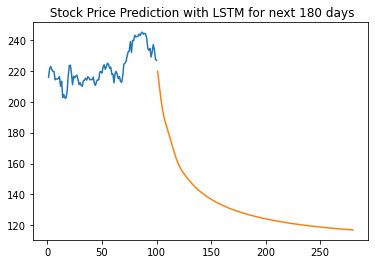

In [86]:
plt.title(' Stock Price Prediction with LSTM for next 180 days')
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


In [87]:
print('RMSE with ARIMA', RMSE_ARIMA)
print('RMSE with LSTM', RMSE_LSTM)

RMSE with ARIMA 19.39989604801805
RMSE with LSTM 187.39532177321206
